In [7]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
from collections import Counter

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [10]:
# Read in data for Per capita income by city
All_Homes_df = pd.read_csv("../Resources/City_Zhvi_AllHomes.csv")
All_Homes_df

,RegionID,SizeRank,RegionName,RegionType,State,StateName,CountyName,Jan-10,Feb-10,Mar-10,...,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
0,6181,0,New York,City,NY,New York,Queens County,444369.0,444560.0,443163.0,...,659421,659007,658239,656925,655613,654394,653930,653901,653565,652307
1,12447,1,Los Angeles,City,CA,California,Los Angeles County,443474.0,441260.0,440817.0,...,712660,713807,715688,718245,721896,725180,730358,735910,744137,752508
2,39051,2,Houston,City,TX,Texas,Harris County,127564.0,127372.0,127497.0,...,186844,187464,188070,188496,189125,189612,190179,190395,190938,191907
3,17426,3,Chicago,City,IL,Illinois,Cook County,217978.0,218203.0,215311.0,...,248372,248646,248725,248483,248278,248090,248029,248220,248599,249152
4,6915,4,San Antonio,City,TX,Texas,Bexar County,127517.0,127650.0,127677.0,...,182732,183350,183930,184846,185490,186244,186420,186962,187129,187718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325,48550,29449,Winton,City,MN,Minnesota,Saint Louis County,78486.0,79689.0,80756.0,...,70929,70176,68979,68537,68948,69481,69423,69355,69654,70399
27326,51821,29449,Eastabuchie,City,MS,Mississippi,Jones County,66148.0,65857.0,65907.0,...,77737,78461,79138,79930,79683,79838,80272,80969,81871,82284
27327,232607,29449,Dean,City,TX,Texas,Clay County,124299.0,124047.0,123632.0,...,178872,179976,180654,181188,181613,182101,182424,182764,182639,182361
27328,6638,29449,Pulaski,City,GA,Georgia,Candler County,70380.0,70546.0,70657.0,...,97356,97757,98014,98225,98303,98613,98802,99227,99699,100464


In [12]:
# Drop duplicates
All_Homes_df.drop_duplicates(subset="RegionName",keep = "first", inplace = True)
len(All_Homes_df)


17616

In [25]:
# Drop Region ID
All_Homes_df.drop('RegionID', axis=1, inplace=True)
All_Homes_df

,SizeRank,RegionName,RegionType,State,StateName,CountyName,Jan-10,Feb-10,Mar-10,Apr-10,...,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
0,0,New York,City,NY,New York,Queens County,444369.0,444560.0,443163.0,442489.0,...,659421,659007,658239,656925,655613,654394,653930,653901,653565,652307
1,1,Los Angeles,City,CA,California,Los Angeles County,443474.0,441260.0,440817.0,441873.0,...,712660,713807,715688,718245,721896,725180,730358,735910,744137,752508
2,2,Houston,City,TX,Texas,Harris County,127564.0,127372.0,127497.0,127711.0,...,186844,187464,188070,188496,189125,189612,190179,190395,190938,191907
3,3,Chicago,City,IL,Illinois,Cook County,217978.0,218203.0,215311.0,215345.0,...,248372,248646,248725,248483,248278,248090,248029,248220,248599,249152
4,4,San Antonio,City,TX,Texas,Bexar County,127517.0,127650.0,127677.0,127675.0,...,182732,183350,183930,184846,185490,186244,186420,186962,187129,187718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27322,29449,Columbus Township,City,PA,Pennsylvania,Warren County,NaN,NaN,NaN,NaN,...,85912,86201,86514,87365,87234,87160,86902,87095,87705,87924
27323,29449,Pursglove,City,WV,West Virginia,Monongalia County,NaN,NaN,NaN,NaN,...,35891,36054,36024,36034,35844,36001,36098,36205,36059,35973
27324,29449,Tome,City,NM,New Mexico,Valencia County,NaN,NaN,NaN,NaN,...,124700,124903,125228,125531,125908,126784,127890,129247,129959,131079
27326,29449,Eastabuchie,City,MS,Mississippi,Jones County,66148.0,65857.0,65907.0,66002.0,...,77737,78461,79138,79930,79683,79838,80272,80969,81871,82284


In [27]:
# Drop State
All_Homes_df.drop('State', axis=1, inplace=True)
All_Homes_df

,SizeRank,RegionName,RegionType,StateName,CountyName,Jan-10,Feb-10,Mar-10,Apr-10,May-10,...,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
0,0,New York,City,New York,Queens County,444369.0,444560.0,443163.0,442489.0,442178.0,...,659421,659007,658239,656925,655613,654394,653930,653901,653565,652307
1,1,Los Angeles,City,California,Los Angeles County,443474.0,441260.0,440817.0,441873.0,445830.0,...,712660,713807,715688,718245,721896,725180,730358,735910,744137,752508
2,2,Houston,City,Texas,Harris County,127564.0,127372.0,127497.0,127711.0,127788.0,...,186844,187464,188070,188496,189125,189612,190179,190395,190938,191907
3,3,Chicago,City,Illinois,Cook County,217978.0,218203.0,215311.0,215345.0,212877.0,...,248372,248646,248725,248483,248278,248090,248029,248220,248599,249152
4,4,San Antonio,City,Texas,Bexar County,127517.0,127650.0,127677.0,127675.0,127681.0,...,182732,183350,183930,184846,185490,186244,186420,186962,187129,187718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27322,29449,Columbus Township,City,Pennsylvania,Warren County,NaN,NaN,NaN,NaN,NaN,...,85912,86201,86514,87365,87234,87160,86902,87095,87705,87924
27323,29449,Pursglove,City,West Virginia,Monongalia County,NaN,NaN,NaN,NaN,NaN,...,35891,36054,36024,36034,35844,36001,36098,36205,36059,35973
27324,29449,Tome,City,New Mexico,Valencia County,NaN,NaN,NaN,NaN,NaN,...,124700,124903,125228,125531,125908,126784,127890,129247,129959,131079
27326,29449,Eastabuchie,City,Mississippi,Jones County,66148.0,65857.0,65907.0,66002.0,66188.0,...,77737,78461,79138,79930,79683,79838,80272,80969,81871,82284


In [28]:
# Drop Region Type
All_Homes_df.drop('RegionType', axis=1, inplace=True)
All_Homes_df

,SizeRank,RegionName,StateName,CountyName,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,...,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
0,0,New York,New York,Queens County,444369.0,444560.0,443163.0,442489.0,442178.0,444115.0,...,659421,659007,658239,656925,655613,654394,653930,653901,653565,652307
1,1,Los Angeles,California,Los Angeles County,443474.0,441260.0,440817.0,441873.0,445830.0,444219.0,...,712660,713807,715688,718245,721896,725180,730358,735910,744137,752508
2,2,Houston,Texas,Harris County,127564.0,127372.0,127497.0,127711.0,127788.0,127292.0,...,186844,187464,188070,188496,189125,189612,190179,190395,190938,191907
3,3,Chicago,Illinois,Cook County,217978.0,218203.0,215311.0,215345.0,212877.0,213038.0,...,248372,248646,248725,248483,248278,248090,248029,248220,248599,249152
4,4,San Antonio,Texas,Bexar County,127517.0,127650.0,127677.0,127675.0,127681.0,127691.0,...,182732,183350,183930,184846,185490,186244,186420,186962,187129,187718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27322,29449,Columbus Township,Pennsylvania,Warren County,NaN,NaN,NaN,NaN,NaN,NaN,...,85912,86201,86514,87365,87234,87160,86902,87095,87705,87924
27323,29449,Pursglove,West Virginia,Monongalia County,NaN,NaN,NaN,NaN,NaN,NaN,...,35891,36054,36024,36034,35844,36001,36098,36205,36059,35973
27324,29449,Tome,New Mexico,Valencia County,NaN,NaN,NaN,NaN,NaN,NaN,...,124700,124903,125228,125531,125908,126784,127890,129247,129959,131079
27326,29449,Eastabuchie,Mississippi,Jones County,66148.0,65857.0,65907.0,66002.0,66188.0,66299.0,...,77737,78461,79138,79930,79683,79838,80272,80969,81871,82284


In [29]:
#Check for nulls
for column in All_Homes_df.columns:
    print(f"column {column} has {All_Homes_df[column].isnull().sum()} null values")

column SizeRank has 0 null values
column RegionName has 0 null values
column StateName has 0 null values
column CountyName has 0 null values
column Jan-10 has 2169 null values
column Feb-10 has 2141 null values
column Mar-10 has 2131 null values
column Apr-10 has 2111 null values
column May-10 has 2090 null values
column Jun-10 has 2070 null values
column Jul-10 has 2060 null values
column Aug-10 has 2032 null values
column Sep-10 has 2011 null values
column Oct-10 has 2000 null values
column Nov-10 has 1985 null values
column Dec-10 has 1979 null values
column Jan-11 has 1912 null values
column Feb-11 has 1894 null values
column Mar-11 has 1862 null values
column Apr-11 has 1834 null values
column May-11 has 1818 null values
column Jun-11 has 1811 null values
column Jul-11 has 1796 null values
column Aug-11 has 1777 null values
column Sep-11 has 1758 null values
column Oct-11 has 1740 null values
column Nov-11 has 1730 null values
column Dec-11 has 1718 null values
column Jan-12 has 1

In [31]:
# List unique states
All_Homes_df["StateName"].unique()

array(['New York', 'California', 'Texas', 'Illinois', 'Pennsylvania',
       'Arizona', 'Nevada', 'Florida', 'Indiana', 'North Carolina',
       'Ohio', 'Kentucky', 'Michigan', 'Colorado', 'Washington',
       'Tennessee', 'Massachusetts', 'District of Columbia', 'Oregon',
       'Maryland', 'Wisconsin', 'Nebraska', 'New Mexico', 'Oklahoma',
       'Georgia', 'Missouri', 'Virginia', 'Minnesota', 'Hawaii',
       'Louisiana', 'Kansas', 'South Carolina', 'Alaska', 'New Jersey',
       'Alabama', 'Idaho', 'Iowa', 'Utah', 'Arkansas', 'Rhode Island',
       'South Dakota', 'Mississippi', 'Connecticut', 'Montana',
       'New Hampshire', 'North Dakota', 'Wyoming', 'Delaware',
       'West Virginia', 'Maine', 'Vermont'], dtype=object)

In [32]:
# State names
All_Homes_df["StateName"].value_counts()

Pennsylvania            1392
Texas                   1104
New York                 959
California               924
Illinois                 727
Ohio                     707
Florida                  569
Missouri                 567
North Carolina           555
Michigan                 554
Minnesota                545
Wisconsin                506
Virginia                 471
Iowa                     455
New Jersey               447
Georgia                  411
Oklahoma                 406
Kentucky                 395
Alabama                  358
Arkansas                 353
Indiana                  352
Washington               333
West Virginia            320
Maryland                 311
Tennessee                310
Louisiana                274
Colorado                 261
Oregon                   236
South Carolina           235
Massachusetts            235
Kansas                   218
Maine                    207
Mississippi              201
Nebraska                 169
Idaho         

In [37]:
# Drop Nulls
All_Homes_cleansed_df = All_Homes_df.dropna(how='any',axis=0) 
All_Homes_cleansed_df

,SizeRank,RegionName,StateName,CountyName,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,...,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
0,0,New York,New York,Queens County,444369.0,444560.0,443163.0,442489.0,442178.0,444115.0,...,659421,659007,658239,656925,655613,654394,653930,653901,653565,652307
1,1,Los Angeles,California,Los Angeles County,443474.0,441260.0,440817.0,441873.0,445830.0,444219.0,...,712660,713807,715688,718245,721896,725180,730358,735910,744137,752508
2,2,Houston,Texas,Harris County,127564.0,127372.0,127497.0,127711.0,127788.0,127292.0,...,186844,187464,188070,188496,189125,189612,190179,190395,190938,191907
3,3,Chicago,Illinois,Cook County,217978.0,218203.0,215311.0,215345.0,212877.0,213038.0,...,248372,248646,248725,248483,248278,248090,248029,248220,248599,249152
4,4,San Antonio,Texas,Bexar County,127517.0,127650.0,127677.0,127675.0,127681.0,127691.0,...,182732,183350,183930,184846,185490,186244,186420,186962,187129,187718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27315,29449,Village Mills,Texas,Tyler County,117190.0,117071.0,116919.0,117195.0,117212.0,117384.0,...,172467,171994,171426,171730,172091,172584,172546,173565,173906,174558
27316,29449,Derby Center,Vermont,Orleans County,150185.0,150015.0,149546.0,149496.0,149722.0,149751.0,...,169819,170361,170714,171388,171764,172331,172573,173269,173510,173921
27319,29449,Port Mansfield,Texas,Willacy County,107805.0,106936.0,106011.0,105720.0,105475.0,105189.0,...,153588,154334,154956,156258,157394,158677,159269,159540,159186,159223
27326,29449,Eastabuchie,Mississippi,Jones County,66148.0,65857.0,65907.0,66002.0,66188.0,66299.0,...,77737,78461,79138,79930,79683,79838,80272,80969,81871,82284


In [120]:
# Export df to csv
All_Homes_cleansed_df.to_csv("C:/Users/PC/OneDrive/Desktop/git/Final Project/Group_8_Final_Project/Resources/All_Homes_cleansed.csv")

In [59]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [72]:
All_df = pd.read_csv(Path('../Resources/All_Homes_cleansed.csv'))
All_df

,Unnamed: 0,SizeRank,RegionName,StateName,CountyName,Jan-10,Feb-10,Mar-10,Apr-10,May-10,...,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
0,0,0,New York,New York,Queens County,444369.0,444560.0,443163.0,442489.0,442178.0,...,659421,659007,658239,656925,655613,654394,653930,653901,653565,652307
1,1,1,Los Angeles,California,Los Angeles County,443474.0,441260.0,440817.0,441873.0,445830.0,...,712660,713807,715688,718245,721896,725180,730358,735910,744137,752508
2,2,2,Houston,Texas,Harris County,127564.0,127372.0,127497.0,127711.0,127788.0,...,186844,187464,188070,188496,189125,189612,190179,190395,190938,191907
3,3,3,Chicago,Illinois,Cook County,217978.0,218203.0,215311.0,215345.0,212877.0,...,248372,248646,248725,248483,248278,248090,248029,248220,248599,249152
4,4,4,San Antonio,Texas,Bexar County,127517.0,127650.0,127677.0,127675.0,127681.0,...,182732,183350,183930,184846,185490,186244,186420,186962,187129,187718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15442,27315,29449,Village Mills,Texas,Tyler County,117190.0,117071.0,116919.0,117195.0,117212.0,...,172467,171994,171426,171730,172091,172584,172546,173565,173906,174558
15443,27316,29449,Derby Center,Vermont,Orleans County,150185.0,150015.0,149546.0,149496.0,149722.0,...,169819,170361,170714,171388,171764,172331,172573,173269,173510,173921
15444,27319,29449,Port Mansfield,Texas,Willacy County,107805.0,106936.0,106011.0,105720.0,105475.0,...,153588,154334,154956,156258,157394,158677,159269,159540,159186,159223
15445,27326,29449,Eastabuchie,Mississippi,Jones County,66148.0,65857.0,65907.0,66002.0,66188.0,...,77737,78461,79138,79930,79683,79838,80272,80969,81871,82284


In [95]:
list(All_df.columns)

['Unnamed: 0',
 'SizeRank',
 'RegionName',
 'StateName',
 'CountyName',
 'Jan-10',
 'Feb-10',
 'Mar-10',
 'Apr-10',
 'May-10',
 'Jun-10',
 'Jul-10',
 'Aug-10',
 'Sep-10',
 'Oct-10',
 'Nov-10',
 'Dec-10',
 'Jan-11',
 'Feb-11',
 'Mar-11',
 'Apr-11',
 'May-11',
 'Jun-11',
 'Jul-11',
 'Aug-11',
 'Sep-11',
 'Oct-11',
 'Nov-11',
 'Dec-11',
 'Jan-12',
 'Feb-12',
 'Mar-12',
 'Apr-12',
 'May-12',
 'Jun-12',
 'Jul-12',
 'Aug-12',
 'Sep-12',
 'Oct-12',
 'Nov-12',
 'Dec-12',
 'Jan-13',
 'Feb-13',
 'Mar-13',
 'Apr-13',
 'May-13',
 'Jun-13',
 'Jul-13',
 'Aug-13',
 'Sep-13',
 'Oct-13',
 'Nov-13',
 'Dec-13',
 'Jan-14',
 'Feb-14',
 'Mar-14',
 'Apr-14',
 'May-14',
 'Jun-14',
 'Jul-14',
 'Aug-14',
 'Sep-14',
 'Oct-14',
 'Nov-14',
 'Dec-14',
 'Jan-15',
 'Feb-15',
 'Mar-15',
 'Apr-15',
 'May-15',
 'Jun-15',
 'Jul-15',
 'Aug-15',
 'Sep-15',
 'Oct-15',
 'Nov-15',
 'Dec-15',
 'Jan-16',
 'Feb-16',
 'Mar-16',
 'Apr-16',
 'May-16',
 'Jun-16',
 'Jul-16',
 'Aug-16',
 'Sep-16',
 'Oct-16',
 'Nov-16',
 'Dec-16',
 'Ja

In [97]:
All_df.describe()

,Unnamed: 0,SizeRank,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,Jul-10,Aug-10,...,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
count,15447.000000,15447.00000,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,...,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04,1.544700e+04
mean,11841.281608,12725.53389,1.786179e+05,1.784194e+05,1.782851e+05,1.782820e+05,1.782565e+05,1.780554e+05,1.776177e+05,1.771023e+05,...,2.316381e+05,2.322305e+05,2.328591e+05,2.335360e+05,2.341894e+05,2.347911e+05,2.354462e+05,2.361892e+05,2.370248e+05,2.379018e+05
std,7845.615541,8690.70567,1.729433e+05,1.731191e+05,1.734121e+05,1.737914e+05,1.741258e+05,1.739933e+05,1.736548e+05,1.733456e+05,...,2.541678e+05,2.541521e+05,2.542909e+05,2.547291e+05,2.551022e+05,2.556725e+05,2.565568e+05,2.578897e+05,2.595412e+05,2.613752e+05
min,0.000000,0.00000,1.111400e+04,1.104200e+04,1.102100e+04,1.111700e+04,1.122300e+04,1.135300e+04,1.145200e+04,1.150100e+04,...,1.274300e+04,1.282400e+04,1.291500e+04,1.291300e+04,1.291100e+04,1.288800e+04,1.300700e+04,1.308000e+04,1.313500e+04,1.313600e+04
25%,4895.000000,5070.00000,8.745600e+04,8.740050e+04,8.734900e+04,8.729650e+04,8.725650e+04,8.723600e+04,8.713900e+04,8.700550e+04,...,1.105860e+05,1.111015e+05,1.114860e+05,1.119235e+05,1.123560e+05,1.128060e+05,1.131640e+05,1.135315e+05,1.138620e+05,1.140900e+05
50%,11063.000000,11615.00000,1.329600e+05,1.328680e+05,1.327400e+05,1.326450e+05,1.326090e+05,1.324490e+05,1.322640e+05,1.318660e+05,...,1.689780e+05,1.695490e+05,1.703020e+05,1.709070e+05,1.714300e+05,1.720880e+05,1.724780e+05,1.729800e+05,1.736410e+05,1.741600e+05
75%,18239.000000,19629.00000,2.070405e+05,2.069980e+05,2.065190e+05,2.063180e+05,2.063390e+05,2.058835e+05,2.052675e+05,2.046615e+05,...,2.653435e+05,2.659070e+05,2.669005e+05,2.678500e+05,2.688815e+05,2.694925e+05,2.702135e+05,2.711100e+05,2.720370e+05,2.728435e+05
max,27327.000000,29449.00000,3.336179e+06,3.367030e+06,3.407339e+06,3.467384e+06,3.479095e+06,3.495056e+06,3.509030e+06,3.528493e+06,...,6.167332e+06,6.184660e+06,6.196047e+06,6.228628e+06,6.245746e+06,6.287618e+06,6.348238e+06,6.446303e+06,6.545225e+06,6.663075e+06


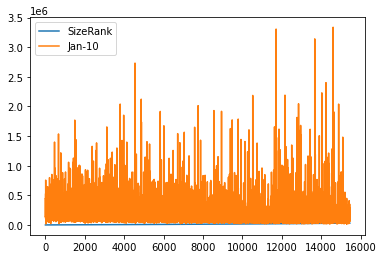

In [100]:
(All_df
 #.groupby('year')
 [['SizeRank', 'Jan-10']]
 #.mean()
 #.quantile(.99)
 .plot()
);

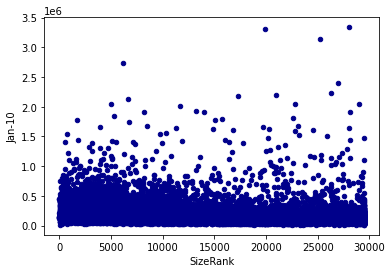

In [101]:
ax1 = All_df.plot.scatter(x='SizeRank',
                      y='Jan-10',
                      c='DarkBlue')

In [102]:
# Swap index and columns
All_df.swapaxes("index", "columns")

,0,1,2,3,4,5,6,7,8,9,...,15437,15438,15439,15440,15441,15442,15443,15444,15445,15446
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,27306,27307,27308,27310,27313,27315,27316,27319,27326,27327
SizeRank,0,1,2,3,4,5,6,7,8,9,...,29449,29449,29449,29449,29449,29449,29449,29449,29449,29449
RegionName,New York,Los Angeles,Houston,Chicago,San Antonio,Philadelphia,Phoenix,Las Vegas,San Diego,Dallas,...,Letts,McAlisterville,Smethport,Mount Charleston,Bloomdale,Village Mills,Derby Center,Port Mansfield,Eastabuchie,Dean
StateName,New York,California,Texas,Illinois,Texas,Pennsylvania,Arizona,Nevada,California,Texas,...,Iowa,Pennsylvania,Pennsylvania,Nevada,Ohio,Texas,Vermont,Texas,Mississippi,Texas
CountyName,Queens County,Los Angeles County,Harris County,Cook County,Bexar County,Philadelphia County,Maricopa County,Clark County,San Diego County,Dallas County,...,Louisa County,Juniata County,McKean County,Clark County,Wood County,Tyler County,Orleans County,Willacy County,Jones County,Clay County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nov-19,654394,725180,189612,248090,186244,185050,260058,284820,659380,227421,...,85535,130015,81431,432294,75488,172584,172331,158677,79838,182101
Dec-19,653930,730358,190179,248029,186420,185581,262379,285736,663421,226790,...,85619,130184,81545,435027,76748,172546,172573,159269,80272,182424
Jan-20,653901,735910,190395,248220,186962,186103,264658,287089,669118,226578,...,85746,130475,81788,437546,77505,173565,173269,159540,80969,182764
Feb-20,653565,744137,190938,248599,187129,186806,266769,288201,673969,226225,...,86165,130900,82053,440668,78307,173906,173510,159186,81871,182639


In [105]:
New_York_df = All_df.iloc[1:2 , 5:]
New_York_df

,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,Jul-10,Aug-10,Sep-10,Oct-10,...,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20
1,443474.0,441260.0,440817.0,441873.0,445830.0,444219.0,442515.0,438684.0,435730.0,432400.0,...,712660,713807,715688,718245,721896,725180,730358,735910,744137,752508


In [106]:
New_df = New_York_df.swapaxes("index", "columns")
New_df

,1
Jan-10,443474.0
Feb-10,441260.0
Mar-10,440817.0
Apr-10,441873.0
May-10,445830.0
...,...
Nov-19,725180.0
Dec-19,730358.0
Jan-20,735910.0
Feb-20,744137.0


In [108]:
df = New_df.reset_index()
df

,index,1
0,Jan-10,443474.0
1,Feb-10,441260.0
2,Mar-10,440817.0
3,Apr-10,441873.0
4,May-10,445830.0
...,...,...
118,Nov-19,725180.0
119,Dec-19,730358.0
120,Jan-20,735910.0
121,Feb-20,744137.0


In [114]:
New_Name_df = df.rename(columns={'index': 'time', '1': 'prices'})
New_Name_df

,time,1
0,Jan-10,443474.0
1,Feb-10,441260.0
2,Mar-10,440817.0
3,Apr-10,441873.0
4,May-10,445830.0
...,...,...
118,Nov-19,725180.0
119,Dec-19,730358.0
120,Jan-20,735910.0
121,Feb-20,744137.0


In [121]:
New_Name_df.to_csv("C:/Users/PC/OneDrive/Desktop/git/Final Project/Group_8_Final_Project/Resources/New_Name_df.csv")

In [175]:
pip install financialanalysis

  Created wheel for financialanalysis: filename=financialanalysis-1.2.0-py3-none-any.whl size=32374 sha256=3fccd3f7c29fc2bc735ca6bb4cb440dd336d685467cc8fce9b9764c7250f1c40
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\78\d0\20\2bacbea717012ef5ba5b6b1ec2c83724709307dca596590914
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=ee19f5afe2bda366059887efdd7956676f878ff73cd7d8cf010a58b5702384ea
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built financialanalysis sklearn
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [208]:
import pandas as pd
from pathlib import Path
import financialanalysis as fa
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression

In [209]:
NewYork_df = pd.read_csv(Path('../Resources/New_Name_df.csv'))
NewYork_df

,Unnamed: 0,time,prices
0,0,10-Jan,443474
1,1,10-Feb,441260
2,2,10-Mar,440817
3,3,10-Apr,441873
4,4,10-May,445830
...,...,...,...
118,118,19-Nov,725180
119,119,19-Dec,730358
120,120,20-Jan,735910
121,121,20-Feb,744137


In [210]:
NewYork_df['time'] =  NewYork_df['time'].apply(lambda x: datetime.strptime(x, "%y-%b"))


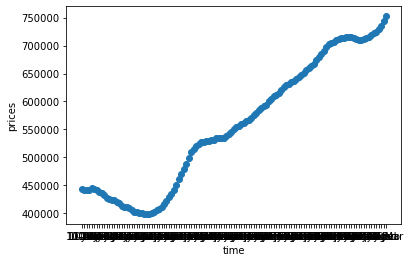

In [211]:
plt.scatter(df.time, df.prices)
plt.xlabel('time')
plt.ylabel('prices')
plt.show()

In [212]:
NewYork_df['time'] =  NewYork_df['time'].apply(lambda x: fa.datetimeToFloatyear(x))


In [213]:
NewYork_df.dtypes

Unnamed: 0      int64
time          float64
prices          int64
dtype: object

In [220]:
X = NewYork_df.time.values.reshape(-1, 1)

In [221]:
X[:5]

array([[2010.00273973],
       [2010.08767123],
       [2010.16438356],
       [2010.24931507],
       [2010.33150685]])

In [222]:
X.shape

(123, 1)

In [223]:
y = df.prices

In [224]:
# Create an instance of the model
model = LinearRegression()

In [225]:
# Train the model with the dataset 
model.fit(X, y)

LinearRegression()

In [226]:
# Create predictions
y_pred = model.predict(X)
print(y_pred.shape)

(123,)


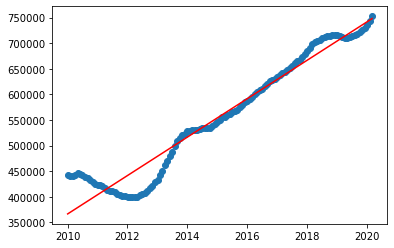

In [227]:
# plot the predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [229]:
# Examine specific parameters (Slope and y-intercepts)
print(model.coef_)
print(model.intercept_)

[37525.16781216]
-75059144.61706889
